# 5.텍스트 데이터 분석

## 5.1 텍스트 전처리

### 5.1.1 토큰화 (Tokenization)
주어진 코퍼스 내에서 분석 대상이 되는 유의한 단위인 토큰으로 나누는 작업 <br>
아래 예시에서 토큰은 단어
<br>

ex)
I like apple <br>
-> token: I, like, apple

<br>

주의사항: 단순히 특수문자 등을 제외하고 공백 기준으로 잘라내는 작업이라고는 할 수 없음 <br>
> ex) 
- 36.5, Ph.D, AT&T <br>
- 줄임말
- 야민정음
- 기타



### 5.1.2 정제 (Cleaning)
가지고 있는 단어 집합에서 불필요한 데이터를 제거하는 것 <br>
토큰화 작업 전후로 적용 <br>

> example
- 등장 빈도가 적은 단어
- 길이가 짧은 단어

### 5.1.3 정규화 (Normalization)
표현방법이 다른 단어를 하나의 단어로 통합

> example
- 대소문자 (covid == COVID)
- 동의어 (covid == 코로나)

#### 표제어 추출 (Lemmatization)
단어의 어근을 찾아 추출

> example
- am, are, is -> be
- apples -> apple


### 5.1.4 불용어 (Stopword)

가지고 있는 데이터 중 불필요한 토큰을 제거하는 작업 <br>
자주 등장하지만 분석에 큰 도움이 되지 않는 단어를 의미 <br>

> example <br>
- and, am, I, about 

<br>

```python
# 영문 불용어
from nltk.corpus import stopwords

stop_words_list = stopwords.words('english')
[word for word in word_tokens if word not in stop_words]

# 한국어 불용어
# https://www.ranks.nl/stopwords/korean
```

## 5.2 텍스트 데이터 분석

### 5.2.1 WordCloud
데이터의 태그들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 표시하는 것 <br>
주로 단어의 빈도를 이용하며, 중요도에 따라 글자의 색상이나 굵기 등 형태를 변화시킬 수 있음
<br>

```python
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

counter = Counter(word_list)

word_cloud = WordCloud(
    background_color="black", 
    max_font_size=60,
    colormap='prism'
    ).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.axis('off')
```
<br>

아래의 방법을 통해 특정 이미지 모양으로 시각화 가능
```python
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image

mask = Image.new('RGBA', (2048, 2048), (255, 255, 255))
image = Image.open('./data/heart.png').convert('RGBA')
x, y = image.size
mask.paste(image, (0, 0, x, y), image)
mask = np.array(mask)

counter = Counter(word_list)

word_cloud = WordCloud(
    background_color="black", 
    max_font_size=60,
    colormap='prism',
    mask=mask,
    ).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.axis('off')
```

In [16]:
import pandas as pd
import numpy as np
import re
import itertools
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from kiwipiepy import Kiwi

In [2]:
kiwi = Kiwi()

In [4]:
only_comments = pd.read_csv(r'C:\Users\user\Documents\github\Big-Data\bigdata2\data\youtube\comments.csv')
video_info = pd.read_csv(r'C:\Users\user\Documents\github\Big-Data\bigdata2\data\youtube\video_info.csv')
comments = video_info.merge(only_comments, on='video_id')

In [5]:
soojung = comments.query('video_id == "JPaubSOSxeM"')

In [17]:
soojung.comments = soojung.comments.apply(lambda x: re.sub('[ㄱ-ㅎㅏ-ㅣ\.!^,]', '', x))

C:\Users\user\AppData\Local\Temp\ipykernel_14108\2530900623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soojung.comments = soojung.comments.apply(lambda x: re.sub('[ㄱ-ㅎㅏ-ㅣ\.!^,]', '', x))


In [7]:
def extract_noun_from_kiwi_analyzed(comment):
    temp_sentence = kiwi.analyze(comment)
    noun_list = [token.form for token in temp_sentence[0][0] if re.match('N', token.tag)]

    return noun_list

In [19]:
soojung['noun_comment'] = soojung.comments.apply(lambda x: extract_noun_from_kiwi_analyzed(x))
total_words = list(itertools.chain(*soojung.noun_comment.values))
word_count = Counter(total_words)

C:\Users\user\AppData\Local\Temp\ipykernel_14108\2610862071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soojung['noun_comment'] = soojung.comments.apply(lambda x: extract_noun_from_kiwi_analyzed(x))


In [25]:
soojung.noun_comment

0                [숨]
1           [아빠, 세뇌]
2              [웃기닼]
3       [여자, 남자, 외박]
4       [이거, 사랑, 애비]
            ...     
3848              []
3849             [등]
3850              []
3851              []
3852              []
Name: noun_comment, Length: 3853, dtype: object

In [26]:
soojung.query('"수정"in comments')


,video_id,title,comments,noun_comment
2598,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,수정,[수정]


In [29]:
soojung.loc[(soojung.comments.str.find('수정') != -1)]

,video_id,title,comments,noun_comment
10,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,수정대역 대박,"[수정, 대역, 박]"
46,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,수정씨 대역 너무 웃겨요,"[수정, 씨, 대역]"
53,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,이름도 수정이네야,"[이름, 수정]"
57,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,가짜수정이 매력 오 뭐드셨어 이부뷴,"[가짜, 수정, 매력, 이부뷴]"
61,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,구 우정 현 수정 쌉캐리네,"[우정, 수정, 쌉캐리네]"
...,...,...,...,...
3631,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,수정이랑,[수정]
3644,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,100만미리축하드립니다\n바둑의수싸움 부녀지간의 수싸움\n해산물 수정이,"[만, 미리, 축하, 바둑, 싸움, 부녀, 간, 싸움, 해산물, 수정]"
3682,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,수정이 극딜 개웃기네,"[수정이, 극, 딜, 개]"
3687,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,가상의 수정이,"[가상, 수정]"


In [30]:
word_count.most_common(20)

[('거', 374),
 ('축하', 262),
 ('만', 254),
 ('영상', 253),
 ('수', 223),
 ('아빠', 194),
 ('너덜트', 187),
 ('것', 158),
 ('딸', 152),
 ('개', 152),
 ('이세돌', 144),
 ('나', 142),
 ('분', 135),
 ('때', 121),
 ('숨', 117),
 ('알파고', 109),
 ('데', 100),
 ('연기', 98),
 ('수정', 95),
 ('이번', 92)]

In [32]:
ddal_list = [word for word in total_words if word == '딸']
word_more_than_2_character = [word for word in total_words if len(word) >=2]
total_words = ddal_list + word_more_than_2_character
word_count = Counter(total_words)

In [39]:
word_count.most_common(100)

[('축하', 262),
 ('영상', 253),
 ('아빠', 194),
 ('너덜트', 187),
 ('딸', 152),
 ('이세돌', 144),
 ('알파고', 109),
 ('연기', 98),
 ('수정', 95),
 ('이번', 92),
 ('이거', 84),
 ('아버지', 81),
 ('낚시', 79),
 ('구독자', 72),
 ('최고', 67),
 ('야채', 65),
 ('아영', 62),
 ('엄마', 62),
 ('마지막', 60),
 ('바둑', 59),
 ('백만', 58),
 ('아버님', 56),
 ('퀄리티', 56),
 ('부모', 54),
 ('디테일', 52),
 ('친구', 51),
 ('반전', 47),
 ('부녀', 47),
 ('우리', 45),
 ('레전드', 44),
 ('신뢰', 42),
 ('하나', 42),
 ('시간', 42),
 ('역대', 40),
 ('채널', 38),
 ('외박', 37),
 ('사람', 37),
 ('남자', 35),
 ('구독', 35),
 ('생각', 34),
 ('어디', 33),
 ('몰입', 33),
 ('전화', 33),
 ('공감', 33),
 ('감사', 32),
 ('소파', 30),
 ('영화', 30),
 ('대본', 29),
 ('남친', 29),
 ('배우', 29),
 ('통화', 29),
 ('수정이', 28),
 ('티키타카', 27),
 ('대국', 27),
 ('정도', 26),
 ('이것', 26),
 ('여기', 25),
 ('방패', 25),
 ('중요', 25),
 ('박스', 24),
 ('오늘', 24),
 ('여자', 23),
 ('이름', 23),
 ('자식', 23),
 ('대사', 23),
 ('누구', 23),
 ('결혼', 22),
 ('낚싯대', 22),
 ('어머니', 22),
 ('현실', 21),
 ('나이', 20),
 ('댓글', 20),
 ('기대', 20),
 ('세상', 19),
 ('스릴러', 19),
 ('

In [35]:
kiwi.add_user_word('아이오아이','NNG', 10)
#True -> 사전에 업데이트가 됨

True

In [36]:
kiwi.analyze('아이오아이')

[([Token(form='아이오아이', tag='NNG', start=0, len=5)], -2.2680587768554688)]

word_count

In [41]:
mask = Image.new('RGBA', (2048, 2048), (255, 255, 255))
image = Image.open('./data/image/heart.png').convert('RGBA')
x, y = image.size
mask.paste(image, (0, 0, x, y), image)
mask = np.array(mask)

In [46]:
word_cloud = WordCloud(
    font_path = 'malgun',
    background_color='black',
    max_font_size=60,
    colormap='prism',
    mask = mask
).generate_from_frequencies(word_count)

(-0.5, 2047.5, 2047.5, -0.5)

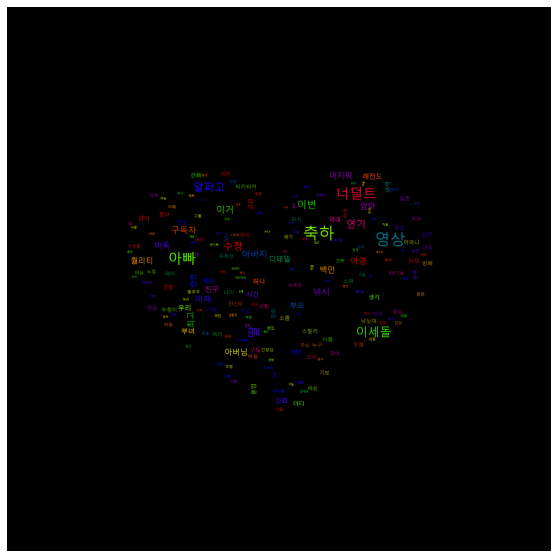

In [47]:
plt.figure(figsize=(20,10))
plt.imshow(word_cloud)
plt.axis('off')

### 5.2.2 TF-IDF
TF-IDF는 단어 빈도와 역 문서 빈도를 사용하여 문서 단어 행렬(DTM) 내의 각 단어 

#### 문서 단어 행렬 (Document-Term Matrix, DTM)
다수의 문서에 등장하는 각 단어들의 빈도를 행렬로 표현한 것

문서1: I like apple and also like samsung<br>
문서2: I like apple watch <br>
문서3: I do like samsumg smart phone <br>
문서4: I hate phone <br>
<br>

|문서|I|like|do|hate|apple|watch|samsung|smart|phone|and|also
|-|-|-|-|-|-|-|-|-|-|-|-|
|문서1|1|2|0|0|1|0|0|0|0|1|1|
|문서2|1|1|0|0|1|1|0|0|0|0|0|
|문서3|1|1|1|0|0|0|1|1|1|0|0|
|문서4|1|0|0|1|0|0|0|0|1|0|0|

<br>

위의 방법으로 행렬 구성 시, 단어가 column이 되는데, 등장하는 단어가 많을수록, 대부분의 벡터가 0을 가지게 됨 <br>

이를 **희소 벡터, 행렬**이라 부름 <br>

이는 많은 저장 공간과 높은 계산 비용을 필요로 하기에, 전처리를 통하여 크기를 줄이는 작업이 중요 <br>


#### Term Fequency (TF)
tf(d, t): 특정 문서 d에서 단어 t의 등장 횟수 <br>
<br>

> ex)
tf(1, 'like') = 2

```python
def term_frequency(term, document):
  return document.count(term)
```

```python
import itertools
import pandas as pd

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsung smart phone', 'I hate phone']
vocab = list(set(word for document in documents for word in document.split()))
tf = []

for i in range(len(documents)):
  tf.append([])
  document = documents[i]
  for j in range(len(vocab)):
    term = vocab[j]
    tf[-1].append(term_frequency(term, document))

tf = pd.DataFrame(tf, columns=vocab)
```

In [75]:
import itertools
import pandas as pd

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsung smart phone', 'I hate phone']

In [49]:
def term_frequency(term, document):
    return document.count(term)

In [78]:
word_list = [document.split() for document in documents]

words = list(itertools.chain(*word_list))


# list(set(words)) #방법1
words = np.unique(words) #방법2

In [80]:
term_frequency_result = []
for document in documents:
    term_frequency_result.append([])
    for term in words:
        term_frequency_result[-1].append(term_frequency(term, document))

term_frequency_df = pd.DataFrame(term_frequency_result, columns=words)
term_frequency_df

,I,also,and,apple,do,hate,like,phone,samsung,smart,watch
0,1,1,1,1,0,0,2,0,1,0,0
1,1,0,0,1,0,0,1,0,0,0,1
2,1,0,0,0,1,0,1,1,1,1,0
3,1,0,0,0,0,1,0,1,0,0,0


In [81]:
term_frequency_result

[[1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0],
 [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0],
 [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]]

#### IDF
df(d, t) = $log(\frac{n}{1+df(t)})$: 특정 단어 t가 등장한 문서의 수 <br>
<br>

> ex) idf

```python
def inverse_document_frequency(term, documents):
  N = len(documents)
  document_frequency = 0

  for document in documents:
    if term in document.split():
      document_frequency += 1
  
  return np.log(N/(document_frequency+1))
```

```python
import pandas as pd
import itertools

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
vocab = list(set(word for document in documents for word in document.split()))
idf = []

result = []
for i in range(len(vocab)):
    term = vocab[i]
    result.append(inverse_document_frequency(term, documents))

idf = pd.DataFrame(result, index=vocab, columns=["IDF"])
```

In [84]:
import itertools
import pandas as pd

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsung smart phone', 'I hate phone']
word_list = [document.split() for document in documents]
words = list(itertools.chain(*word_list))
words = np.unique(words) 

In [87]:
def inverse_document_frequency(term, document):
    N = len(documents)
    document_frequency = 0

    for document in documents:
        if term in document.split():
            document_frequency += 1

    return np.log(N/(document_frequency+1))

In [89]:
idf_list = []
for term in words : 
    idf_list.append(inverse_document_frequency(term, documents))

idf = pd.DataFrame(idf_list, index=words, columns=['idf'])
idf

,idf
I,-0.223144
also,0.693147
and,0.693147
apple,0.287682
do,0.693147
hate,0.693147
like,0.000000
phone,0.287682
samsung,0.287682
smart,0.693147


In [90]:
def tf_idf(term,document,documents):
    return term_frequency(term, document)*inverse_document_frequency(term,documents)

In [92]:
tf_idf_result = []
for document in documents:
    tf_idf_result.append([])
    for term in words:
        tf_idf_result[-1].append(tf_idf(term,document,documents))

_tfidf = pd.DataFrame(tf_idf_result,columns=words)
_tfidf

,I,also,and,apple,do,hate,like,phone,samsung,smart,watch
0,-0.223144,0.693147,0.693147,0.287682,0.000000,0.000000,0.0,0.000000,0.287682,0.000000,0.000000
1,-0.223144,0.000000,0.000000,0.287682,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.693147
2,-0.223144,0.000000,0.000000,0.000000,0.693147,0.000000,0.0,0.287682,0.287682,0.693147,0.000000
3,-0.223144,0.000000,0.000000,0.000000,0.000000,0.693147,0.0,0.287682,0.000000,0.000000,0.000000


In [99]:
from sklearn.metrics.pairwise import cosine_similarity

In [98]:
#벡터 간 각도구하기
cosine_similarity(_tfidf)

array([[1.        , 0.1561046 , 0.11269482, 0.05863967],
       [0.1561046 , 1.        , 0.05863967, 0.08122753],
       [0.11269482, 0.05863967, 1.        , 0.1561046 ],
       [0.05863967, 0.08122753, 0.1561046 , 1.        ]])

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [119]:
vector = CountVectorizer()  # tf
vector.fit_transform(documents).toarray()  # word count

array([[1, 1, 1, 0, 0, 2, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [106]:
#인덱스 번호
vector.vocabulary_

{'like': 5,
 'apple': 2,
 'and': 1,
 'also': 0,
 'samsung': 7,
 'watch': 9,
 'do': 3,
 'smart': 8,
 'phone': 6,
 'hate': 4}

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
vector = TfidfVectorizer().fit(documents)
tfidf_ = vector.fit_transform(documents).toarray()

In [122]:
cosine_similarity(tfidf_)

array([[1.        , 0.45682263, 0.34057055, 0.        ],
       [0.45682263, 1.        , 0.14969553, 0.        ],
       [0.34057055, 0.14969553, 1.        , 0.25547778],
       [0.        , 0.        , 0.25547778, 1.        ]])

#### TF-IDF
단어의 빈도와 역 문서 빈도의 곱 <br>
단어의 중요도를 가중치로 주는 방법 <br>

```python
def tf_idf(term, document, documents):
  return term_frequency(term, document) * inverse_document_frequency(t, documents)
```
```python
import pandas as pd
import itertools

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
vocab = list(set(word for document in documents for word in document.split()))
tf_idf_result = []

for i in range(len(documents)):
  tf_idf_result.append([])
  document = documents[i]
  for j in range(len(vocab)):
    term = vocab[j]
    tf_idf_result[-1].append(tf_idf(term, document, documents))

tfidf_ = pd.DataFrame(tf_idf_result, columns=vocab)
tfidf_
```

#### CountVectorizer

```python
from sklearn.feature_extraction.text import CountVectorizer

documents=['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']

vector = CountVectorizer()
vector.fit_transform(documents).toarray()   # tf
vector.vocabulary_                      # word count
```

#### TfidfVectorizer

```python
from sklearn.feature_extraction.text import TfidfVectorizer

documents=['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']

vector = TfidfVectorizer().fit(documents)
vector.fit_transform(documents).toarray()   # tf
vector.vocabulary_                          # word count
```

### 5.2.3 Association Rule
항목 간 관계를 규칙 기반으로 분석하는 방법 <br>
마케팅 등에서 고객 상품 구매 데이터를 활용해 품목 간 연관성을 본다는 의미에서 장바구니 분석이라고도 불림 <br>

> example <br>
- 삼겹살, 소주 -> 삼겹살을 사는 고객은 소주도 같이 구매한다

```python
from apyori import apriori

```

### 분석 방법
거래 내역이 아래와 같이 주어져 있다고 가정

|번호|품목|
|-|-|
|1|삼겹살, 상추, 소주|
|2|삼겹살, 소주|
|3|삼겹살, 깻잎|
|4|닭고기, 비누|
|5|닭고기, 상추, 고추|

<br>
<br>

위의 거래 내역을 이용하여 다음의 구매 행렬을 만들 수 있음 <br>

||삼겹살|상추|소주|깻잎|닭고기|비누|고추|
|-|-|-|-|-|-|-|-|
|삼겹살|3|1|2|0|0|1|1|
|상추 |1|2|1|0|1|0|1|
|소주|2|1|2|0|0|0|0|
|깻잎|0|0|0|1|0|0|0|
|닭고기|0|1|0|0|2|1|1|
|비누|1|0|0|0|1|1|0|
|고추|1|1|0|0|1|0|1|

<br>
위의 규칙을 보면 삼겹살을 사는 고객은 소주를 산다는 것을 확인할 수 있음 <br>
그러나 이는 정성적이므로, 정량적 평가 지표를 도입하여 이러한 연관 규칙이 유효한지 판단 <br>

1. Confidence <br>
X가 포함하는 거래 내역 중 Y가 포함된 비율이 높아야 함 <br>
$P(소주|삼겹살) = \frac{\frac{2}{5}}{\frac{3}{5}} = \frac{2}{3} $
2. Support <br>
X와 Y를 동시에 포함하는 비율이 높아야 함 $P(X \cap Y)$ <br>
신뢰도 $P(삼겹살|소주) = \frac{\frac{1}{5}}{\frac{2}{5}} = \frac{1}{2} $이나 거래 건수가 5개 중 1개<br>
이는 아직 발생 횟수가 충분하지 않아 소주를 사면 삼겹살을 샀다라는 규칙을 지지하기 위해 실질적으로는 $P(X \cap Y)$가 높아야 함을 의미
3. Lift <br>
신뢰도가 만약 $P(Y|X)=0.8$이었고 이는 충분히 높은 수치라고 판단하여 X -> Y라는 규칙이 의미 있다고 판단 할 수 있을 것 <br>
하지만 Y가 발생한 비율이 0.8이었다고 하면 $P(Y|X) = P(Y)$가 되어 X는 Y를 설명하는데 아무런 도움이 되지 못함 <br>
따라서 $P(Y|X)/P(Y)를 계산하는데 이를 향상도(Lift)라고 함 <br>
- Lift = 1: X와 Y는 독립
- Lift > 1: X가 Y 발생 확률을 X를 고려하지 않았을 때보다 증가시킴 (X가 Y 증가 예측에 도움을 줌)
- Lift < 1: X가 Y 발생 확률을 X를 고려하지 않았을 때보다 감소시킴 (X가 Y 감소 예측에 도움을 줌) 

<br>
<br>

```python
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
words = list(itertools.chain(*[document.split() for document in documents]))
items = [words[i:i+3] for i in range(len(words)-3)]

transaction_encoder = TransactionEncoder()
te_result = transaction_encoder.fit(items).transform(items)
data = pd.DataFrame(te_result, columns=np.unique(words))
itemset = apriori(data
association_rules(itemset, metric='confidence', min_threshold=0.5)
```



In [124]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [125]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [129]:
documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsung smart phone', 'I hate phone']
documents
word_list = [document.split() for document in documents]
words = list(itertools.chain(*word_list))
documents

['I like apple and also like samsung',
 'I like apple watch',
 'I do like samsung smart phone',
 'I hate phone']

In [ ]:
# word_list = documents[0].split()
# [word_list[index:index+2] for index, word in enumerate(word_list) if index < len(word_list) -1]

In [138]:
items = []
for document in documents:
    word_list = document.split()
    slided_words = [word_list[index:index+2] for index, word in enumerate(word_list) if index < len(word_list) -1]
    items.extend(slided_words)

items

[['I', 'like'],
 ['like', 'apple'],
 ['apple', 'and'],
 ['and', 'also'],
 ['also', 'like'],
 ['like', 'samsung'],
 ['I', 'like'],
 ['like', 'apple'],
 ['apple', 'watch'],
 ['I', 'do'],
 ['do', 'like'],
 ['like', 'samsung'],
 ['samsung', 'smart'],
 ['smart', 'phone'],
 ['I', 'hate'],
 ['hate', 'phone']]

In [139]:
transaction_encoder = TransactionEncoder()
transaction_encoder_matrix = transaction_encoder.fit(items).transform(items)

In [140]:
transaction_encoder_matrix

array([[ True, False, False, False, False, False,  True, False, False,
        False, False],
       [False, False, False,  True, False, False,  True, False, False,
        False, False],
       [False, False,  True,  True, False, False, False, False, False,
        False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False, False],
       [False,  True, False, False, False, False,  True, False, False,
        False, False],
       [False, False, False, False, False, False,  True, False,  True,
        False, False],
       [ True, False, False, False, False, False,  True, False, False,
        False, False],
       [False, False, False,  True, False, False,  True, False, False,
        False, False],
       [False, False, False,  True, False, False, False, False, False,
        False,  True],
       [ True, False, False, False,  True, False, False, False, False,
        False, False],
       [False, False, False, False,  True, False,  True, Fal

In [142]:
data = pd.DataFrame(transaction_encoder_matrix, columns = np.unique(words))
data

,I,also,and,apple,do,hate,like,phone,samsung,smart,watch
0,True,False,False,False,False,False,True,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False,False
2,False,False,True,True,False,False,False,False,False,False,False
3,False,True,True,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,True,False,True,False,False
6,True,False,False,False,False,False,True,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,False
8,False,False,False,True,False,False,False,False,False,False,True
9,True,False,False,False,True,False,False,False,False,False,False


In [150]:
itemset = apriori(data,min_support=0.1,use_colnames=True)
itemset

,support,itemsets
0,0.2500,(I)
1,0.1250,(also)
2,0.1250,(and)
3,0.2500,(apple)
4,0.1250,(do)
5,0.1250,(hate)
6,0.5000,(like)
7,0.1250,(phone)
8,0.1875,(samsung)
9,0.1250,(smart)


In [151]:
association_rules(itemset,metric='support',min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(I),(like),0.2500,0.5000,0.125,0.500000,1.000000,0.00000,1.000000
1,(like),(I),0.5000,0.2500,0.125,0.250000,1.000000,0.00000,1.000000
2,(apple),(like),0.2500,0.5000,0.125,0.500000,1.000000,0.00000,1.000000
3,(like),(apple),0.5000,0.2500,0.125,0.250000,1.000000,0.00000,1.000000
4,(like),(samsung),0.5000,0.1875,0.125,0.250000,1.333333,0.03125,1.083333
5,(samsung),(like),0.1875,0.5000,0.125,0.666667,1.333333,0.03125,1.500000


수정이네 실습

In [174]:
slided_comments = soojung.loc[soojung.noun_comment.map(len) >= 2].noun_comment.apply(
    lambda x: [x[index:index+2] for index, word in enumerate(x) if index < len(word_list) -1])

In [175]:
slided_comments

1           [[아빠, 세뇌], [세뇌]]
3       [[여자, 남자], [남자, 외박]]
4       [[이거, 사랑], [사랑, 애비]]
5         [[아영, 님], [님, 짧대]]
6          [[년, 아버지], [아버지]]
                ...         
3830      [[영상, 전], [전, 기대]]
3832           [[꿀, 잼], [잼]]
3834       [[마지막, 킬포], [킬포]]
3836       [[너덜트, 영상], [영상]]
3846        [[오, 옹], [옹, 오]]
Name: noun_comment, Length: 2550, dtype: object

In [180]:
items = list(itertools.chain(*slided_comments))
items

[['아빠', '세뇌'],
 ['세뇌'],
 ['여자', '남자'],
 ['남자', '외박'],
 ['이거', '사랑'],
 ['사랑', '애비'],
 ['아영', '님'],
 ['님', '짧대'],
 ['년', '아버지'],
 ['아버지'],
 ['이번', '편'],
 ['편', '레전드'],
 ['좀비', '소리'],
 ['소리'],
 ['수정', '대역'],
 ['대역', '박'],
 ['나', '이야기'],
 ['이야기', '기업'],
 ['외박', '장려'],
 ['장려', '아버님'],
 ['스물', '아홉'],
 ['아홉', '애비'],
 ['야채', '누나'],
 ['누나', '뷰티'],
 ['죈장', '몇'],
 ['몇', '번'],
 ['돈', '나이'],
 ['나이'],
 ['세상', '아빠'],
 ['아빠', '평생'],
 ['아빠', '남친'],
 ['남친'],
 ['아내', '짓'],
 ['짓', '딸래미'],
 ['이번', '스릴러'],
 ['스릴러', '숨'],
 ['본인', '아빠'],
 ['아빠', '자연'],
 ['사람', '번'],
 ['번', '사람'],
 ['아버지', '세뇌'],
 ['세뇌'],
 ['아귀', '연기'],
 ['연기', '거'],
 ['중간', '몰입'],
 ['몰입', '급발진'],
 ['사랑', '모습'],
 ['모습'],
 ['인간', '골프채'],
 ['골프채', '낙시대구'],
 ['저', '뒤'],
 ['뒤', '아버지'],
 ['느낌', '번'],
 ['번', '채널'],
 ['아빠', '야스오'],
 ['야스오', '말투'],
 ['영어', '자막'],
 ['자막', '한국인'],
 ['번', '개'],
 ['개'],
 ['아빠', '낚시'],
 ['낚시', '대'],
 ['수정', '씨'],
 ['씨', '대역'],
 ['이세돌', '신'],
 ['신', '수'],
 ['낚시', '대'],
 ['대'],
 ['서', '선생'],
 ['선생', '것'],
 ['아버님', '구라'],
 ['

In [179]:
items = list(itertools.chain(*slided_comments))
transaction_encoder = TransactionEncoder()
transaction_encoder_matrix = transaction_encoder.fit(items).transform(items)
data = pd.DataFrame(transaction_encoder_matrix, columns = np.unique(words))
itemset = apriori(data,min_support=0.02,use_colnames=True)
association_rules(itemset,metric='support',min_threshold=0.02)

ValueError: Shape of passed values is (5100, 1546), indices imply (5100, 11)

In [185]:
soojung['noun_comment_with_greater_than_2_length'] = soojung.noun_comment.apply(lambda x:[word for word in x if len(word)>=2 or word =='딸'])

C:\Users\user\AppData\Local\Temp\ipykernel_14108\2327941613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soojung['noun_comment_with_greater_than_2_length'] = soojung.noun_comment.apply(lambda x:[word for word in x if len(word)>=2 or word =='딸'])


In [187]:
# soojung.noun_comment
new_soojung = soojung.loc[soojung.noun_comment_with_greater_than_2_length.map(len) >= 1]
# soojung['noun_str'] = soojung.noun_comment.str.join(' ')

In [188]:
new_soojung

,video_id,title,comments,noun_comment,noun_comment_with_greater_than_2_length
1,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠가 세뇌 당함,"[아빠, 세뇌]","[아빠, 세뇌]"
2,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아 존나 웃기닼,[웃기닼],[웃기닼]
3,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,여자들아 남자 믿지 말고 외박하지마라,"[여자, 남자, 외박]","[여자, 남자, 외박]"
4,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,이건 사랑이 아니다 애비를 죽여라,"[이거, 사랑, 애비]","[이거, 사랑, 애비]"
5,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아영님 짧대에서 보다가 여기서 보니까 신기하당,"[아영, 님, 짧대, 여기]","[아영, 짧대, 여기]"
...,...,...,...,...,...
3830,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,영상 한참 기다렸네요\n보기 전부터 기대됩니다,"[영상, 전, 기대]","[영상, 기대]"
3831,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,고정,[고정],[고정]
3834,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,마지막 킬포,"[마지막, 킬포]","[마지막, 킬포]"
3836,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,너덜트 영상은 못참지,"[너덜트, 영상]","[너덜트, 영상]"


In [189]:
new_soojung['noun_str']= new_soojung.noun_comment_with_greater_than_2_length.str.join(' ')

C:\Users\user\AppData\Local\Temp\ipykernel_14108\3762738673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_soojung['noun_str']= new_soojung.noun_comment_with_greater_than_2_length.str.join(' ')


In [191]:
new_soojung.noun_str.values

array(['아빠 세뇌', '웃기닼', '여자 남자 외박', ..., '마지막 킬포', '너덜트 영상', '너덜트'],
      dtype=object)

In [195]:
documents = new_soojung.noun_str.values
vector = TfidfVectorizer().fit(documents)
tfidf = vector.fit_transform(documents).toarray()


In [196]:
tfidf.shape #행 댓글수 / 열 단어수 

(2967, 2212)

In [199]:
cosine_similarity_for_soojung = cosine_similarity(tfidf)

In [208]:
new_soojung.loc[cosine_similarity_for_soojung[0] > 0.4]

,video_id,title,comments,noun_comment,noun_comment_with_greater_than_2_length,noun_str
1,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠가 세뇌 당함,"[아빠, 세뇌]","[아빠, 세뇌]",아빠 세뇌
28,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,왜 아버지를 세뇌시키세요,"[아버지, 세뇌]","[아버지, 세뇌]",아버지 세뇌
444,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,어 아빠?,[아빠],[아빠],아빠
472,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠 너무 웃겨요,[아빠],[아빠],아빠
636,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,그 아빠에 그 딸이네,"[아빠, 딸]","[아빠, 딸]",아빠 딸
672,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠 질린다,[아빠],[아빠],아빠
773,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠킹받어,"[아빠, 킹]",[아빠],아빠
910,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,나도 저럴듯 딸가진 아빠는 뭐 똑같지싶음,"[나, 듯, 딸, 아빠]","[딸, 아빠]",딸 아빠
1332,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아너무 웃김요 \n나도 저런아빠될거같아,"[나, 아빠, 거]",[아빠],아빠
1416,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,3:21:아빠 화 안낸다\n3:29:뭐?,"[아빠, 화]",[아빠],아빠


## 5.3 영어 자료 분석

In [131]:
import pandas as pd
import numpy as np
import itertools
from nltk.tokenize import wordpunct_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag

In [11]:
news = pd.read_csv(r'C:\Users\user\Documents\github\Big-Data\bigdata2\data\news\english_news.csv')
contractions = pd.read_csv(r'C:\Users\user\Documents\github\Big-Data\bigdata2\data\contractions.txt')

In [20]:
contractions['word\tcontraction'].str.split('\t')
contractions_without_empty_string = contractions['word\tcontraction'].str.split('\t').apply(lambda x: [word for word in x if word])
#(contractions['word\tcontraction'].str.split('\t').apply(lambda x: [word for word in x if word]).map(len) !=2).sum() #모두 두개인지 확인

In [23]:
flatten_contractions = list(itertools.chain(*contractions_without_empty_string))

In [25]:
contractions_2d = [flatten_contractions[i:i+2] for i in range(0, len(flatten_contractions),2)]

In [30]:
contractions_2d = np.array(flatten_contractions).reshape(-1,2) #2차원은 정해져있음, -1은 값을 모를때

In [44]:
contractions = pd.DataFrame(contractions_2d, columns = ['original', 'contraction'])
contractions.contraction = contractions.contraction.str.replace('’',"'")
contractions 

,original,contraction
0,are not,aren't
1,cannot,can't
2,could not,couldn't
3,did not,didn't
4,do not,don't
5,does not,doesn't
6,had not,hadn't
7,have not,haven't
8,he is,he's
9,he has,he's


In [65]:
pd.concat([contractions,pd.DataFrame([['It is', "It's"]],
columns = ['original','contraction'])],
axis=0).reset_index()

ValueError: cannot insert level_0, already exists

In [50]:
text = "I'm not a rich"

In [51]:
def convert_contraction_into_original(text,contractions):
    for row in contractions.itertuples():
        text = text.replace(row.contraction, row.original)
    return text

In [52]:
list(contractions.itertuples())

[Pandas(Index=0, original='are not', contraction="aren't"),
 Pandas(Index=1, original='cannot', contraction="can't"),
 Pandas(Index=2, original='could not', contraction="couldn't"),
 Pandas(Index=3, original='did not', contraction="didn't"),
 Pandas(Index=4, original='do not', contraction="don't"),
 Pandas(Index=5, original='does not', contraction="doesn't"),
 Pandas(Index=6, original='had not', contraction="hadn't"),
 Pandas(Index=7, original='have not', contraction="haven't"),
 Pandas(Index=8, original='he is', contraction="he's"),
 Pandas(Index=9, original='he has', contraction="he's"),
 Pandas(Index=10, original='he will', contraction="he'll"),
 Pandas(Index=11, original='he would', contraction="he'd"),
 Pandas(Index=12, original='here is', contraction="here's"),
 Pandas(Index=13, original='I am', contraction="I'm"),
 Pandas(Index=14, original='I have', contraction="I've"),
 Pandas(Index=15, original='I will', contraction="I'II"),
 Pandas(Index=16, original='I would', contraction="

In [53]:
convert_contraction_into_original(text,contractions)

'I am not a rich'

In [54]:
news

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [66]:
news.Title = news.Title.apply(lambda x: convert_contraction_into_original(x, contractions))
news.Description = news.Description.apply(lambda x: convert_contraction_into_original(x, contractions))
news

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It is barely dawn when Mike Fitzpatrick s...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [68]:
news.Title = news.Title.apply(lambda x: x.replace('(AP)',''))
news.Description = news.Description.str.replace('AP - ','') #더 많이 사용!

In [81]:
tokenized_sentence = wordpunct_tokenize(news.Description[0])


['Unions',
 'representing',
 'workers',
 'at',
 'Turner',
 'Newall',
 'say',
 'they',
 'are',
 "'",
 'disappointed',
 "'",
 'after',
 'talks',
 'with',
 'stricken',
 'parent',
 'firm',
 'Federal',
 'Mogul',
 '.']

In [83]:
regex_tokenizer = RegexpTokenizer('\w+')
regex_tokenizeed_sentence = regex_tokenizer.tokenize(news.Description[0])
regex_tokenizeed_sentence

['Unions',
 'representing',
 'workers',
 'at',
 'Turner',
 'Newall',
 'say',
 'they',
 'are',
 'disappointed',
 'after',
 'talks',
 'with',
 'stricken',
 'parent',
 'firm',
 'Federal',
 'Mogul']

In [86]:
word_lemmatizer = WordNetLemmatizer()

In [91]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [93]:
[word_lemmatizer.lemmatize(word) for word in regex_tokenizeed_sentence]

['Unions',
 'representing',
 'worker',
 'at',
 'Turner',
 'Newall',
 'say',
 'they',
 'are',
 'disappointed',
 'after',
 'talk',
 'with',
 'stricken',
 'parent',
 'firm',
 'Federal',
 'Mogul']

In [94]:
[word_lemmatizer.lemmatize(word, pos='v') for word in regex_tokenizeed_sentence]

['Unions',
 'represent',
 'workers',
 'at',
 'Turner',
 'Newall',
 'say',
 'they',
 'be',
 'disappoint',
 'after',
 'talk',
 'with',
 'stricken',
 'parent',
 'firm',
 'Federal',
 'Mogul']

In [95]:
[word_lemmatizer.lemmatize(word) for word in regex_tokenizeed_sentence]

['Unions',
 'representing',
 'worker',
 'at',
 'Turner',
 'Newall',
 'say',
 'they',
 'are',
 'disappointed',
 'after',
 'talk',
 'with',
 'stricken',
 'parent',
 'firm',
 'Federal',
 'Mogul']

In [106]:
news['tokenized_title'] = news.Title.apply(lambda x : regex_tokenizer.tokenize(x))
news['tokenized_description'] = news.Description.apply(lambda x : regex_tokenizer.tokenize(x))

In [107]:
news.tokenized_title = news.tokenized_title.apply(lambda x : [word_lemmatizer.lemmatize(word) for word in x])
news.tokenized_description = news.tokenized_description.apply(lambda x : [word_lemmatizer.lemmatize(word) for word in x])

In [108]:
news

,Class Index,Title,Description,tokenized_title,tokenized_description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,"[Fears, for, T, N, pension, after, talk]","[Unions, representing, worker, at, Turner, New..."
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...","[The, Race, is, On, Second, Private, Team, Set...","[SPACE, com, TORONTO, Canada, A, second, team,..."
2,4,Ky. Company Wins Grant to Study Peptides,A company founded by a chemistry researcher at...,"[Ky, Company, Wins, Grant, to, Study, Peptides]","[A, company, founded, by, a, chemistry, resear..."
3,4,Prediction Unit Helps Forecast Wildfires,It is barely dawn when Mike Fitzpatrick starts...,"[Prediction, Unit, Helps, Forecast, Wildfires]","[It, is, barely, dawn, when, Mike, Fitzpatrick..."
4,4,Calif. Aims to Limit Farm-Related Smog,Southern California's smog-fighting agency wen...,"[Calif, Aims, to, Limit, Farm, Related, Smog]","[Southern, California, s, smog, fighting, agen..."
...,...,...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...,"[Around, the, world]","[Ukrainian, presidential, candidate, Viktor, Y..."
7596,2,Void is filled with Clement,With the supply of attractive pitching options...,"[Void, is, filled, with, Clement]","[With, the, supply, of, attractive, pitching, ..."
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,"[Martinez, leaf, bitter]","[Like, Roger, Clemens, did, almost, exactly, e..."
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,"[5, of, arthritis, patient, in, Singapore, tak...","[SINGAPORE, Doctors, in, the, United, States, ..."


In [116]:
stop_words = set(stopwords.words('english'))



In [118]:
news['title_tokens'] = news.tokenized_title.apply(lambda x: [word for word in x if word not in stop_words])
news['description_tokens'] = news.tokenized_description.apply(lambda x: [word for word in x if word not in stop_words])

In [119]:
news

,Class Index,Title,Description,tokenized_title,tokenized_description,title_tokens,description_tokens
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,"[Fears, for, T, N, pension, after, talk]","[Unions, representing, worker, at, Turner, New...","[Fears, T, N, pension, talk]","[Unions, representing, worker, Turner, Newall,..."
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...","[The, Race, is, On, Second, Private, Team, Set...","[SPACE, com, TORONTO, Canada, A, second, team,...","[The, Race, On, Second, Private, Team, Sets, L...","[SPACE, com, TORONTO, Canada, A, second, team,..."
2,4,Ky. Company Wins Grant to Study Peptides,A company founded by a chemistry researcher at...,"[Ky, Company, Wins, Grant, to, Study, Peptides]","[A, company, founded, by, a, chemistry, resear...","[Ky, Company, Wins, Grant, Study, Peptides]","[A, company, founded, chemistry, researcher, U..."
3,4,Prediction Unit Helps Forecast Wildfires,It is barely dawn when Mike Fitzpatrick starts...,"[Prediction, Unit, Helps, Forecast, Wildfires]","[It, is, barely, dawn, when, Mike, Fitzpatrick...","[Prediction, Unit, Helps, Forecast, Wildfires]","[It, barely, dawn, Mike, Fitzpatrick, start, s..."
4,4,Calif. Aims to Limit Farm-Related Smog,Southern California's smog-fighting agency wen...,"[Calif, Aims, to, Limit, Farm, Related, Smog]","[Southern, California, s, smog, fighting, agen...","[Calif, Aims, Limit, Farm, Related, Smog]","[Southern, California, smog, fighting, agency,..."
...,...,...,...,...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...,"[Around, the, world]","[Ukrainian, presidential, candidate, Viktor, Y...","[Around, world]","[Ukrainian, presidential, candidate, Viktor, Y..."
7596,2,Void is filled with Clement,With the supply of attractive pitching options...,"[Void, is, filled, with, Clement]","[With, the, supply, of, attractive, pitching, ...","[Void, filled, Clement]","[With, supply, attractive, pitching, option, d..."
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,"[Martinez, leaf, bitter]","[Like, Roger, Clemens, did, almost, exactly, e...","[Martinez, leaf, bitter]","[Like, Roger, Clemens, almost, exactly, eight,..."
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,"[5, of, arthritis, patient, in, Singapore, tak...","[SINGAPORE, Doctors, in, the, United, States, ...","[5, arthritis, patient, Singapore, take, Bextr...","[SINGAPORE, Doctors, United, States, warned, p..."


In [127]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [123]:
total_words = Counter(itertools.chain(*news.title_tokens))

In [128]:
word_cloud = WordCloud(
    background_color='black',
    max_font_size = 100,
    colormap= 'prism'
).generate_from_frequencies(total_words)

(-0.5, 399.5, 199.5, -0.5)

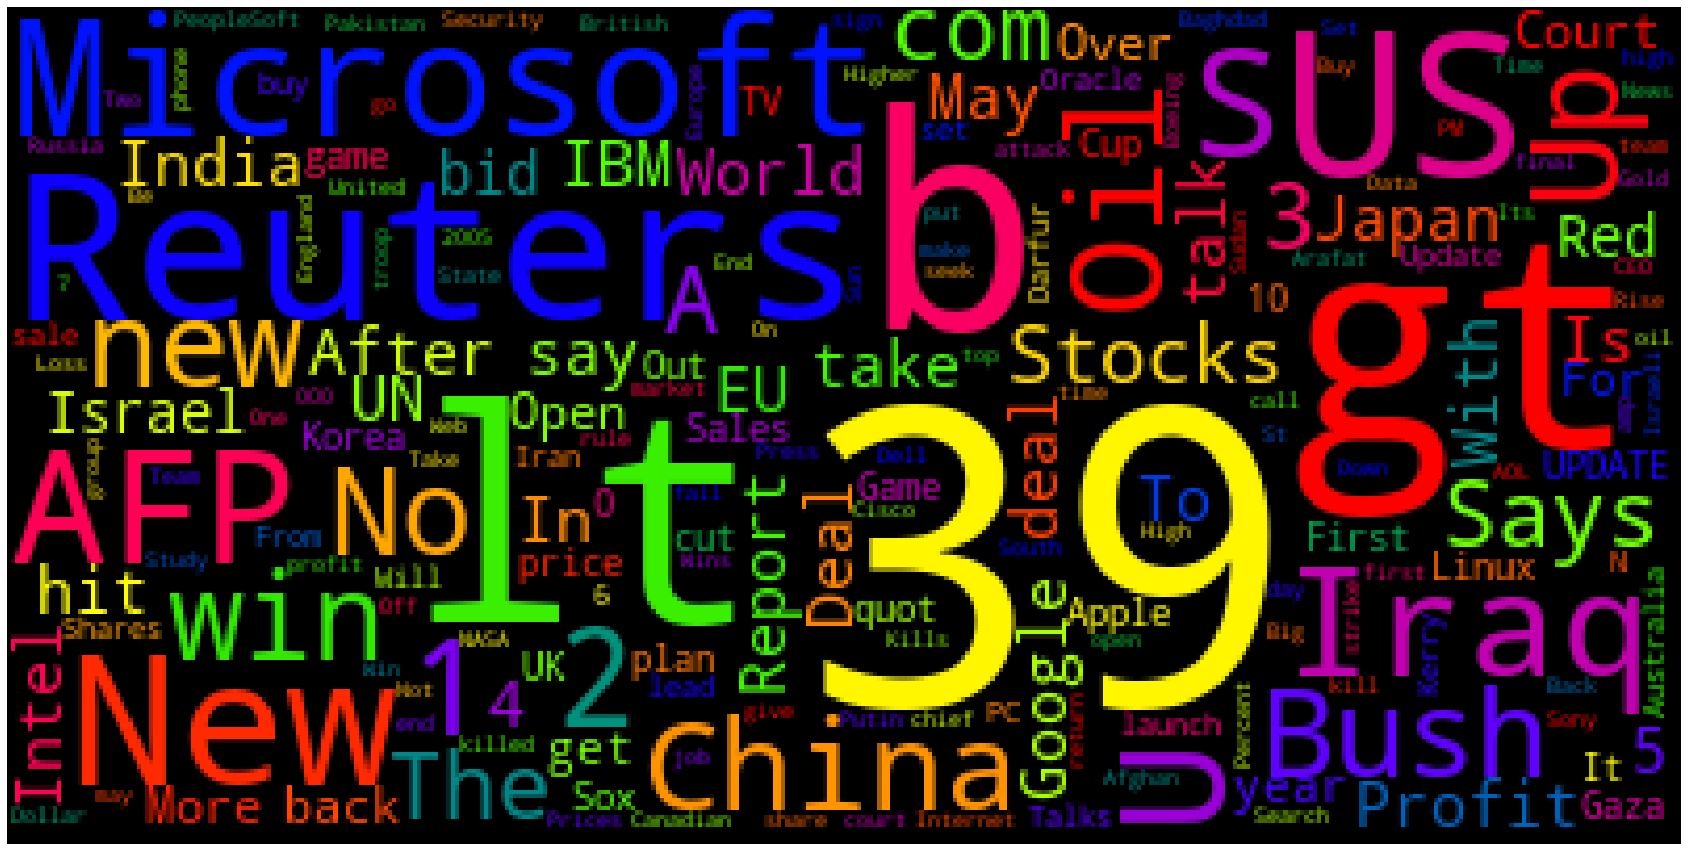

In [135]:
plt.figure(figsize=(30, 20))
plt.imshow(word_cloud)
plt.axis('off')

In [8]:
contractions = pd.DataFrame(
    np.array([word for word in contractions['word\tcontraction'].str.split('\t').explode().values if word != '']).reshape(-1,2),
    columns = ['words','contraction'])

In [239]:
contractions.contraction = contractions.contraction.str.replace('’','\'')


In [242]:
def explde_contractions(string,contractions):
    for index, contraction in enumerate(contractions.contraction):
        if contraction in string:
            string = string.replace(contraction, contractions.words[index])
    return string


In [248]:
explde_contractions('You aren\'t a boy', contractions)

'You are not a boy'

In [246]:
news.Title.apply(lambda x : explde_contractions(x,contractions))

0                       Fears for T N pension after talks
1       The Race is On: Second Private Team Sets Launc...
2           Ky. Company Wins Grant to Study Peptides (AP)
3           Prediction Unit Helps Forecast Wildfires (AP)
4             Calif. Aims to Limit Farm-Related Smog (AP)
                              ...                        
7595                                     Around the world
7596                          Void is filled with Clement
7597                               Martinez leaves bitter
7598    5 of arthritis patients in Singapore take Bext...
7599                               EBay gets into rentals
Name: Title, Length: 7600, dtype: object

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
def remove_stopwords(string,stopwords_list):
    for stopword in stopwords_list:
        if stopword in string:
            string = string.replace(stopword,'')
    return string

In [ ]:
news['title_removed_stopword']news.Title.apply(lambda x : remove_stopwords(x,stopwords_list))

In [ ]:
news

## 5.4 한국어 자료 전처리

In [ ]:
news.Title